<a href="https://colab.research.google.com/github/Singhsshweta/Diabetes-Prediction-with-Feature-Selection-and-Adaptive-Learning/blob/main/Diabetes_ANN_adaptiveLR_earlystopping_classweights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
from imblearn.over_sampling import SMOTE
from keras.regularizers import l1
from keras.layers import LeakyReLU
from keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
correlation_matrix = data.corr()
correlation_matrix
# Display the correlation values between features and 'Glucose'
correlation_with_glucose = correlation_matrix['Outcome'].sort_values(ascending=False)
print(correlation_with_glucose)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [ ]:
correlation_threshold = 0.13
selected_features = correlation_with_glucose[abs(correlation_with_glucose) >= correlation_threshold].index
data_selected = data[selected_features]
print(data_selected.head())


   Outcome  Glucose   BMI  Age  Pregnancies  DiabetesPedigreeFunction  Insulin
0        1      148  33.6   50            6                     0.627        0
1        0       85  26.6   31            1                     0.351        0
2        1      183  23.3   32            8                     0.672        0
3        0       89  28.1   21            1                     0.167       94
4        1      137  43.1   33            0                     2.288      168


In [ ]:
features = data_selected.drop('Outcome',axis=1)
target = data_selected['Outcome']

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(features)
#X_normalized = scaler.fit_transform(data_selected)

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X_normalized,target,test_size=0.12,random_state =200)


In [ ]:
oversampler = SMOTE(random_state=200)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.25),
    Dense(64),
    #BatchNormalization(),
    LeakyReLU(alpha=0.1),
    #Dropout(0.25),
    Dense(16),
    #BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 128)               896       
                                                                 
 batch_normalization_159 (B  (None, 128)               512       
 atchNormalization)                                              
                                                                 
 leaky_re_lu_102 (LeakyReLU  (None, 128)               0         
 )                                                               
                                                                 
 dropout_103 (Dropout)       (None, 128)               0         
                                                                 
 dense_269 (Dense)           (None, 64)                8256      
                                                                 
 leaky_re_lu_103 (LeakyReLU  (None, 64)              

In [ ]:
#optimizer = SGD(learning_rate=0.001, momentum=0.9)

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
def scheduler(epoch,learning_rate):
  if epoch<40:
    return 0.005
  learning_rate *= .993
  return learning_rate
lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
class_weights = {0: 0.5197, 1: 0.4803}

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=30, validation_split=0.15, verbose=1, callbacks=[lr_scheduler,es], class_weight=class_weights)

Epoch 1/150
20/20 [==============================] - 2s 16ms/step - loss: 0.3500 - accuracy: 0.7435 - val_loss: 0.6880 - val_accuracy: 0.6471 - lr: 0.0050
Epoch 2/150
20/20 [==============================] - 0s 7ms/step - loss: 0.3343 - accuracy: 0.7417 - val_loss: 0.6648 - val_accuracy: 0.6078 - lr: 0.0050
Epoch 3/150
20/20 [==============================] - 0s 7ms/step - loss: 0.3117 - accuracy: 0.7487 - val_loss: 0.6526 - val_accuracy: 0.6667 - lr: 0.0050
Epoch 4/150
20/20 [==============================] - 0s 7ms/step - loss: 0.2953 - accuracy: 0.7766 - val_loss: 0.6334 - val_accuracy: 0.7255 - lr: 0.0050
Epoch 5/150
20/20 [==============================] - 0s 7ms/step - loss: 0.2802 - accuracy: 0.7818 - val_loss: 0.6359 - val_accuracy: 0.7059 - lr: 0.0050
Epoch 6/150
20/20 [==============================] - 0s 7ms/step - loss: 0.2682 - accuracy: 0.7836 - val_loss: 0.6251 - val_accuracy: 0.7059 - lr: 0.0050
Epoch 7/150
20/20 [==============================] - 0s 7ms/step - loss: 0.

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4537 - accuracy: 0.8710


[0.4537065029144287, 0.8709677457809448]

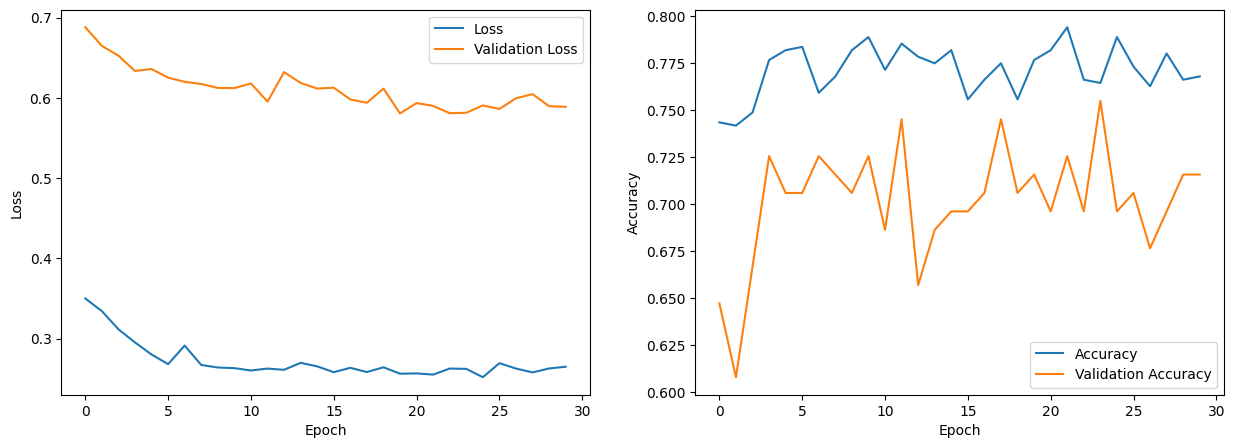

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(loss, label='Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(accuracy, label='Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [ ]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)


3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        64
           1       0.95      0.62      0.75        29

    accuracy                           0.87        93
   macro avg       0.90      0.80      0.83        93
weighted avg       0.88      0.87      0.86        93

